In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos
import sw_and_int_one_sess as sios

/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_disinhibition'
figdir = misc.get_or_create_subdir(figdir)

In [4]:
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
savefn_full = os.path.join(data_dir,'per_field_metrics_shtest_with_1cp.p')
per_field_metrics_all=pickle.load(open(savefn_full,'rb'))

# gpb=per_field_metrics_all.groupby(level=(0,1,4),sort=False)
# fr_nrem_all = []
# for k,val in gpb:
#     fr_nrem=np.ones(val.shape[0]) * cell_metrics_df_all.loc[k,'firingRate_NREMstate']
#     fr_nrem_all.append(pd.Series(fr_nrem,index=val.index))
# fr_nrem_all = pd.concat(fr_nrem_all,axis=0)
    

# per_field_metrics_all['fr_nrem']=fr_nrem_all

In [5]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
occu_map_all = prepped_data_agg['occu_map_all']
fr_map_all = prepped_data_agg['fr_map_all']

pval_all = prepped_data_agg['pval_all']
X_pwc_all = prepped_data_agg['X_pwc_all']
X_raw_all = prepped_data_agg['X_raw_all']
changes_df_all = prepped_data_agg['changes_df_all']
var_res_all_test = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
all_sw_d_all = prepped_data_agg['all_sw_d_all']
all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
best_n_all_test = prepped_data_agg['best_n_all']
spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 


In [531]:
sw_info_res_pelt

{'all_sw_d':       trialtype  uid  field_index         time  speed_gauss  field_pos  \
 0 0         1.0   38            1  7964.387367    16.422599       96.0   
   1         1.0   99            1  7981.808433    26.377156       67.0   
   2         1.0  111            0  7981.041583    23.271079       56.0   
   3         1.0  125            1  7982.692000    20.246782       78.0   
   4         1.0  150            1  7982.441933    23.947267       75.0   
 ...         ...  ...          ...          ...          ...        ...   
   431       1.0  236            0  9930.850733     4.964605       54.0   
   432       1.0  409            0  9926.666333    15.011358       48.0   
   433       1.0  448            1  9936.785567    13.975442       81.0   
   434      both   35            0  9921.615067    14.129712        9.0   
   435      both  258            0  9915.430167    19.335120        2.0   
 
        trial_index  switch  index_within  switch_trial  switch_trial_frac  \
 0 0    

In [6]:
import switch_detection_sweep_penalty_one_session as sdspos
import get_all_switch_add_metrics_pen as gasamp
reload(gasamp)
pen=0.5#0.3#0.3#0.5

best_n_all = {}
X_pwc_all={}
X_raw_all={}
changes_df_all={}
var_res_all={}
corr_all = {}
p_corr_all = {}
all_sw_d_all={}
all_sw_with_metrics_d_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    sw_res_pelt = sdspos.main(data_dir_full,force_reload=False,dosave=False,load_only=True)
    
    sw_info_res_pelt=gasamp.main(data_dir_full,force_reload=False,load_only=True,dosave=False)
    if sw_info_res_pelt is None:
        sw_info_res_pelt=gasamp.main(data_dir_full,force_reload=True,load_only=False)
    all_sw_d = sw_info_res_pelt['all_sw_d_pen'][pen]
    all_sw_d_all[ani,sess] = all_sw_d
    all_sw_with_metrics_d = sw_info_res_pelt['all_sw_with_metrics_d_pen'][pen]
    all_sw_with_metrics_d_all[ani,sess] = all_sw_with_metrics_d
    
    all_sw_res= gasamp.main(data_dir_full,force_reload=False,dosave=False,load_only=True)
    sw_res_pelt = sw_res_pelt[pen]
    
    best_n_all[ani,sess]=sw_res_pelt['best_n']
    X_pwc_all[ani,sess]=sw_res_pelt['X_pwc']
    X_raw_all[ani,sess]=sw_res_pelt['X_raw']
    changes_df_all[ani,sess]=sw_res_pelt['changes_df']
    var_res_all[ani,sess]=sw_res_pelt['var_res']
    corr_all[ani,sess]=sw_res_pelt['corr']
    p_corr_all[ani,sess]=sw_res_pelt['p_corr']
    
best_n_all = pd.concat(best_n_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
X_raw_all = pd.concat(X_raw_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
p_corr_all = pd.concat(p_corr_all,axis=0)

all_sw_d_all=pd.concat(all_sw_d_all,axis=0)
all_sw_with_metrics_d_all = pd.concat(all_sw_with_metrics_d_all,axis=0)


/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/switch_analysis/all_sw_info_pe

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_9f1/e15_9f1_200729/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201019/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201019/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e14/e14_2m2/e14_2m2_201019/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210319/py_data/switch_analysis/all_sw_info_pen.p exists; 

In [12]:
import peer_prediction as pp
per_field_metrics_one=per_field_metrics_all.loc[ani,sess]
selected_int_mean_fr_within_field=sw_and_int_res['selected_int_mean_fr_within_field']
all_sw_with_metrics = all_sw_with_metrics_d_all.loc[ani,sess]
all_sw_inh = pp.add_inh_fr_change_to_all_sw(all_sw_with_metrics,selected_int_mean_fr_within_field,per_field_metrics_one,ti=0)



/tmp/ipykernel_1701341/1544407487.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_one=per_field_metrics_all.loc[ani,sess]
/tmp/ipykernel_1701341/1544407487.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_with_metrics = all_sw_with_metrics_d_all.loc[ani,sess]


KeyError: (0.0, 29, 0)

In [15]:
selected_int_mean_fr_within_field.loc['both',1]

,,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
35,0,13.518479,13.267313,14.527369,15.229983,18.124615,12.471315,11.558888,12.897671,12.015601,12.255052,...,14.419374,10.277885,12.203939,10.034079,11.291253,9.422479,12.458473,10.366977,14.357813,16.806411
54,0,19.392040,13.798249,14.738093,12.539235,16.769503,14.582968,11.625878,11.546649,16.264098,16.725673,...,14.133717,13.543362,8.486284,9.738642,14.812886,11.883789,12.003794,11.317542,10.890354,12.652331
56,0,18.789161,17.667863,16.145788,15.620954,19.787511,16.935802,15.218371,15.833658,17.174719,14.235850,...,17.259185,16.358676,15.222125,13.498536,16.254247,15.190966,15.603872,15.899281,15.270211,19.117766
59,0,15.459951,16.606035,14.953674,14.766484,17.347487,14.728254,14.271025,13.551537,14.842713,13.989315,...,15.566538,15.595403,13.519921,13.293733,15.148996,13.573631,14.952116,13.587138,14.472222,16.372580
82,0,17.162300,16.683061,16.982698,15.779270,17.896971,15.123345,16.496767,14.353335,16.035531,15.325118,...,17.834029,20.741438,17.653572,16.383960,19.764444,15.289062,17.251739,16.988096,17.786670,17.872716
88,0,18.394798,21.261221,19.206568,20.140359,21.997993,18.418060,18.322048,17.516253,19.352904,18.080385,...,22.155645,22.848161,18.856866,17.749654,21.642424,16.803956,19.758041,18.960852,20.310225,19.765101
93,0,16.765682,18.771183,17.454459,17.051464,20.601743,16.670592,16.556632,16.118657,17.870031,15.351201,...,19.829645,21.552452,18.358204,16.809777,18.330566,17.605232,18.018086,17.758828,18.566729,18.507213
99,0,16.502617,17.121348,15.266749,15.238934,19.259992,15.698150,14.488113,14.715675,16.393166,14.601427,...,16.917771,17.375353,14.223073,14.347793,15.771759,14.900840,16.294914,14.055512,15.537801,17.023743
118,0,12.890836,11.438749,12.476838,10.094172,9.651132,9.750462,10.680329,7.796614,9.823780,9.666256,...,13.830347,14.181422,10.572694,10.070747,12.009352,12.378630,9.631065,12.881460,10.524446,11.344309
150,0,16.582740,17.916535,16.059828,15.887748,17.013081,15.333011,14.622933,14.143264,15.868448,14.356805,...,18.533895,20.681765,16.206447,16.278665,17.836741,14.901670,16.223653,15.186947,15.746800,16.326874


In [33]:
# reload(sios)
# sios.main(data_dir_full,force_reload=True,dosave=False)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_res_afterheadscan.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/switch_analysis/all_sw_info_pen.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/place_field_afterheadscan_recombine.p exists; loading---


/mnt/home/szheng/projects/place_variability/code/sw_and_int_one_sess.py:78: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_one = per_field_metrics_all.loc[(ani,sess),:]


{'consec_trial_fr_diff_all':                     inh     pyr_1     pyr_2     pyr_3     pyr_4     int_1  \
 0.0  3   0 0  -0.189098  0.565348 -0.018081 -0.402499 -0.244857 -0.189098   
            1   0.130961 -0.583429 -0.967846 -0.810205 -0.967846  0.130961   
            2   0.037897 -0.384418 -0.226776 -0.384418 -0.384418  0.037897   
            3   0.907485  0.157642  0.000000  0.000000  0.000000  0.907485   
            4  -2.302433 -0.157642 -0.157642 -0.157642 -0.157642 -2.302433   
 ...                 ...       ...       ...       ...       ...       ...   
 both 448 0 65  0.589562 -0.183162 -0.364516 -0.182689  0.115702  0.589562   
            66  0.177592 -0.181354  0.000474  0.298864       NaN  0.177592   
            67  1.419354  0.181827  0.480218       NaN       NaN  1.419354   
            68 -1.854628  0.298390       NaN       NaN       NaN -1.854628   
            69       NaN       NaN       NaN       NaN       NaN       NaN   
 
                   int_2     int_3

In [7]:
import peer_prediction as pp
reload(sios)
consec_trial_fr_diff_all = {}
sustained_all = {}
transient_all={}
all_sw_with_inh_change_all = {}
for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    sw_and_int_res=sios.main(data_dir_full,force_reload=False,load_only=True)
    consec_trial_fr_diff=sw_and_int_res['consec_trial_fr_diff_all']
    sustained=sw_and_int_res['sustained']
    transient =sw_and_int_res['transient']
    consec_trial_fr_diff_all[ani,sess] = consec_trial_fr_diff
    sustained_all[ani,sess] = sustained
    transient_all[ani,sess] = transient
    
    all_sw_with_inh_change = sw_and_int_res['all_sw_with_metrics_oneti_with_inh_change']
    all_sw_with_inh_change_all[ani,sess]=all_sw_with_inh_change
    



    
all_sw_with_inh_change_all=pd.concat(all_sw_with_inh_change_all,axis=0)
    
consec_trial_fr_diff_all = pd.concat(consec_trial_fr_diff_all,axis=0)
sustained_all = pd.concat(sustained_all,axis=0)
transient_all = pd.concat(transient_all,axis=0)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/sw_and_int_pen_5e-01.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e16/e16_3m2/e16_3m2_211213/py_data/sw_and_in

In [ ]:
# per_field_metrics_one = per_field_metrics_all.loc[(ani,sess),:]
# all_sw_with_metrics_oneti_with_inh_change= pp.add_inh_fr_change_to_all_sw(all_sw_with_metrics,mean_within_field_pred_all,per_field_metrics_one,ti=0)


In [106]:
consec_trial_fr_diff_all

inh     pyr_1     pyr_2     pyr_3  \
e13_26m1 e13_26m1_210913 0.0  3  0 0  -0.189098  0.565348 -0.018081 -0.402499   
                                   1   0.130961 -0.583429 -0.967846 -0.810205   
                                   2   0.037897 -0.384418 -0.226776 -0.384418   
                                   3   0.907485  0.157642  0.000000  0.000000   
                                   4  -2.302433 -0.157642 -0.157642 -0.157642   
...                                         ...       ...       ...       ...   
e14_2m3  e14_2m3_201118  both 53 0 19  0.631108 -0.278657 -0.221549 -0.124412   
                                   20  4.037379  0.057108  0.154245 -0.007214   
                                   21 -2.951633  0.097137 -0.064322       NaN   
                                   22 -6.839295 -0.161459       NaN       NaN   
                                   23       NaN       NaN       NaN       NaN   

                                          pyr_4     int_1     int_2     int_3  \
e13_26m1 e13_26m1_210913 0.0  3  0 0  -0.244857 -0.189098 -0.058137 -0.020240   
                                   1  -0.967846  0.130961  0.168858  1.076344   
                                   2  -0.384418  0.037897  0.945383 -1.357050   
                                   3   0.000000  0.907485 -1.394947 -0.135005   
                                   4  -0.157642 -2.302433 -1.042491 -0.038861   
...                                         ...       ...       ...       ...   
e14_2m3  e14_2m3_201118  both 53 0 19 -0.285871  0.631108  4.668487  1.716854   
                                   20       NaN  4.037379  1.085746 -5.753549   
                                   21       NaN -2.951633 -9.790929       NaN   
                                   22       NaN -6.839295       NaN       NaN   
                                   23       NaN       NaN       NaN       NaN   

                                          int_4  fr_prior  
e13_26m1 e13_26m1_210913 0.0  3  0 0   0.887246  0.402499  
                                   1  -1.226089  0.685172  
                                   2  -0.097108  0.584921  
                                   3   0.868624  0.438691  
                                   4  -1.506386  0.382481  
...                                         ...       ...  
e14_2m3  e14_2m3_201118  both 53 0 19 -5.122441  0.332760  
                                   20       NaN  0.326421  
                                   21       NaN  0.323255  
                                   22       NaN  0.324586  
                                   23       NaN       NaN  

[202145 rows x 10 columns]

# use switch metrics to distinguish 

In [194]:
sw=1#-1
sw_key_d={1:'ON',-1:'OFF'}
inh_thresh = 1
sw_ma = all_sw_with_inh_change_all['switch']==sw
if sw==1:
    quality_ma=all_sw_with_inh_change_all['pre_ntrial_ge_30_perc_frac_total'] < 0.1
#     quality_ma=(all_sw_with_inh_change_all['pre_ntrial_ge_30_perc_frac_total'] < 0.1)&(all_sw_with_inh_change_all['post_ntrial_ge_50_perc_frac_total'] > 0.6)
#     quality_ma=(all_sw_with_inh_change_all['post_ntrial_ge_50_perc_frac_total'] > 0.6)
else:
    quality_ma=all_sw_with_inh_change_all['post_ntrial_ge_30_perc_frac_total'] < 0.1

inh_ma = all_sw_with_inh_change_all['inh_fr_change'].abs()>1
# ma = sw_ma & quality_ma & inh_ma
ma = sw_ma & quality_ma 
# ma = sw_ma & inh_ma
# ma = sw_ma

# ma = (all_sw_with_inh_change_all['switch']==1)&(all_sw_with_inh_change_all['inh_fr_change'].abs()>1)





e15_13f1_220117
WilcoxonResult(statistic=1042.0, pvalue=0.11800235238173101)
TtestResult(statistic=1.3244610523526397, pvalue=0.09527267427404286, df=58)
RanksumsResult(statistic=1.8019818243546282, pvalue=0.07154826523029789)


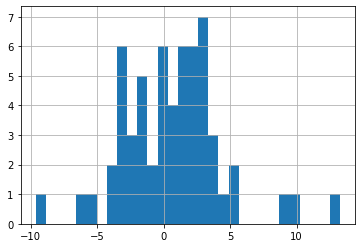

In [139]:
ii=1

sess = all_sw_with_inh_change_all.index.get_level_values(1).unique()[ii]
print(sess)
data=all_sw_with_inh_change_all.loc[(slice(None),sess),:]
sw=-1
ma= (data['switch']==sw)# & (data['pre_ntrial_ge_30_perc_frac_total'] < 0.1)
data.loc[ma]['inh_fr_change'].hist(bins=30)
print(scipy.stats.wilcoxon(data.loc[ma]['inh_fr_change'].dropna(),alternative='greater'))
print(scipy.stats.ttest_1samp(data.loc[ma]['inh_fr_change'].dropna(),0,alternative='greater'))

pop=consec_trial_fr_diff_all.loc[(slice(None),sess),:]['inh'].dropna()
print(scipy.stats.ranksums(data.loc[ma]['inh_fr_change'].dropna(),pop))

(<Figure size 432x288 with 1 Axes>, <Axes: xlabel='Trial', ylabel='value'>)

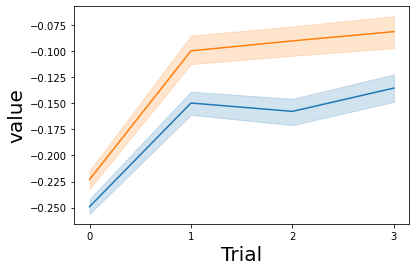

In [142]:
data = copy.copy(consec_trial_fr_diff_all.loc[(slice(None),sess),:])
pyr_thresh = 0
inh_thresh = 0
ma= (data['inh']<-inh_thresh) & (data['pyr_1']<-pyr_thresh) # (data['has_sw'])
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']
fig,ax=ph.mean_across_row_vs_col_with_err(toplot)

ma= (data['inh']>inh_thresh) &(data['pyr_1']<-pyr_thresh) #& (data['has_sw'])
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']
ph.mean_across_row_vs_col_with_err(toplot,fig=fig,ax=ax)

In [145]:
allsw_data=all_sw_with_inh_change_all.loc[(slice(None),sess),:]

In [164]:
data_sub = []
for _,row in allsw_data.query('switch==-1')[['trialtype','uid','field_index','switch_trial']].iterrows():
    tt,uid,field_id,sw_tr = row
    data_sub.append(data.loc[(slice(None),slice(None),tt,uid,field_id,sw_tr-1)])
data_sub = pd.concat(data_sub,axis=0)

(<Figure size 432x288 with 1 Axes>, <Axes: xlabel='Trial', ylabel='value'>)

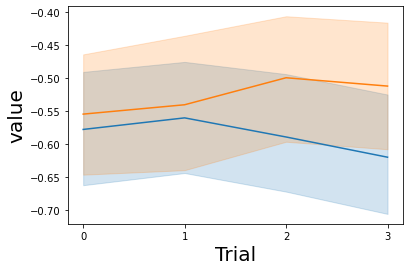

In [166]:

pyr_thresh = 0
inh_thresh = 0
ma= (data_sub['inh']<-inh_thresh) 
toplot=data_sub.loc[ma].loc[:,'pyr_1':'pyr_4']
fig,ax=ph.mean_across_row_vs_col_with_err(toplot)

ma= (data_sub['inh']>inh_thresh) 
toplot=data_sub.loc[ma].loc[:,'pyr_1':'pyr_4']
ph.mean_across_row_vs_col_with_err(toplot,fig=fig,ax=ax)

TtestResult(statistic=-0.3536538883294875, pvalue=0.7248806088518134, df=58)

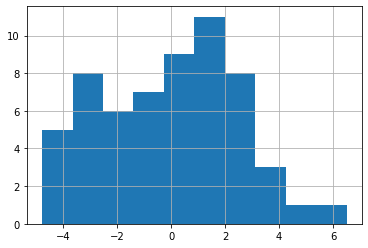

In [170]:
data_sub['inh'].hist()
scipy.stats.ttest_1samp(data_sub['inh'],0)

<Axes: >

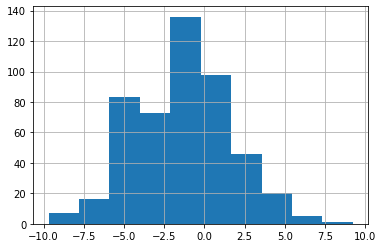

In [144]:
ma = (data['pyr_1'] < -0.4) & (data.loc[:,'pyr_2':'pyr_4'] < -0.2).all(axis=1)
data.loc[ma,'inh'].hist()


WilcoxonResult(statistic=169023.0, pvalue=7.788443831708304e-06)

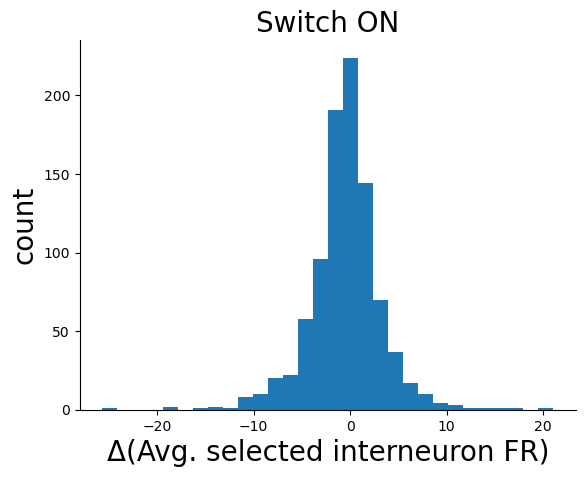

In [195]:
ax=all_sw_with_inh_change_all.loc[ma]['inh_fr_change'].hist(bins=30,grid=False,density=False)
sns.despine()
sw_key = sw_key_d[sw]
title = f'Switch {sw_key}'
ax.set(xlabel=u'Δ(Avg. selected interneuron FR)',ylabel='count',title=title)
scipy.stats.wilcoxon(all_sw_with_inh_change_all.loc[ma]['inh_fr_change'].dropna(),alternative='less')

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

disinhibition vs. more inhibition: Mann-Whitney-Wilcoxon test two-sided, P_val:1.040e-07 U_stat=3.593e+05


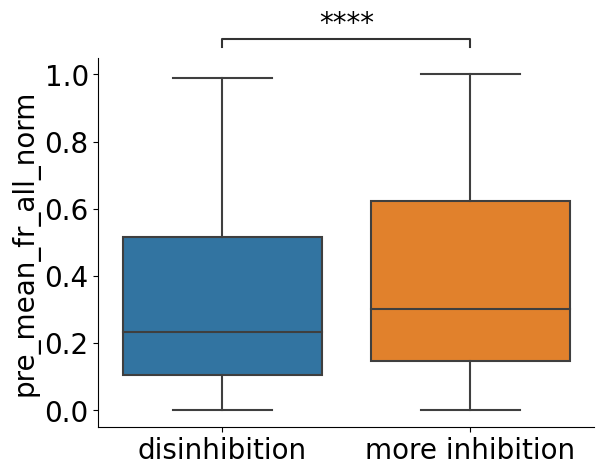

In [251]:
data=all_sw_with_inh_change_all
sw=1
thresh=1.
metric_key = 'pre_mean_fr_all_norm'
# metric_key = 'pre_mean_fr_all'

ma = data['inh_fr_change']<-thresh
xx=data.loc[ma,metric_key].dropna()
# ax=xx.hist(label='disinhibition',alpha=0.3,density=True,grid=False,bins=20)

ma = data['inh_fr_change']>thresh
yy=data.loc[ma,metric_key].dropna()
# ax=yy.hist(label='more inhibition',ax=ax,alpha=0.3,density=True,grid=False,bins=20)
# ax.legend()
# ax.set_ylabel('Density')
# ax.set_xlabel(metric_key)
# ax.set_title(f'switch={sw}')


toplot=pd.concat({'disinhibition':pd.Series(xx.values),'more inhibition':pd.Series(yy.values)}).reset_index(level=0)
toplot.columns=['type',metric_key]



from statannotations.Annotator import Annotator

x='type'
y=metric_key
# ax = sns.violinplot(data=toplot,x=x,y=y)
ax = sns.boxplot(data=toplot,x=x,y=y)
pairs=[('disinhibition','more inhibition')]
annotator=Annotator(ax,pairs,data=toplot,x=x,y=y)
annotator.configure(test='Mann-Whitney', text_format='star', loc='outside')
annotator.apply_and_annotate()

# ax.set(ylabel='Num. Trial before switch\n>=30% max',xlabel='')
ax.set(ylabel=metric_key,xlabel='')


sns.despine()

# ph.plot_cdf_and_ks_test(xx,yy)
# print(scipy.stats.ranksums(xx,yy))


# peri switch, seperate into disinhibition and inhibition

In [213]:
ani,sess = subdb.iloc[1][['animal_name.1','sess_name']]
ti=0
X_raw=X_raw_all.loc[(ani,sess,ti),:]
all_sw_inh = all_sw_with_inh_change_all.loc[ani,sess]

/tmp/ipykernel_4088050/3321277846.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  X_raw=X_raw_all.loc[(ani,sess,ti),:]
/tmp/ipykernel_4088050/3321277846.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  all_sw_inh = all_sw_with_inh_change_all.loc[ani,sess]


<Axes: >

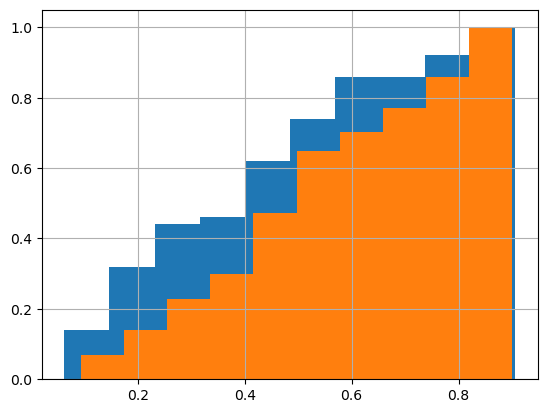

In [179]:
# all_sw_inh_onesw[ma_d['disinhibition']]['switch_trial_frac'].hist(density=True,cumulative=True)
# all_sw_inh_onesw[ma_d['more inhibition']]['switch_trial_frac'].hist(density=True,cumulative=True)

In [181]:
# consec_trial_fr_diff_all=consec_trial_fr_diff_all.reset_index(level=5).rename({'level_5':'trial_within'},axis=1)

In [186]:
# consec_trial_fr_diff_all['trial_within'] = consec_trial_fr_diff_all.index.get_level_values(5)

# xx=consec_trial_fr_diff_all.groupby(level=(0,1,2),sort=False).apply(lambda x:x['trial_within'].values/x['trial_within'].max())
# consec_trial_fr_diff_all['trial_within_frac'] = np.concatenate(xx.values)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'KS Test: p-value = 0.000 *'}, xlabel='Trial (normalized)', ylabel='CDF'>)

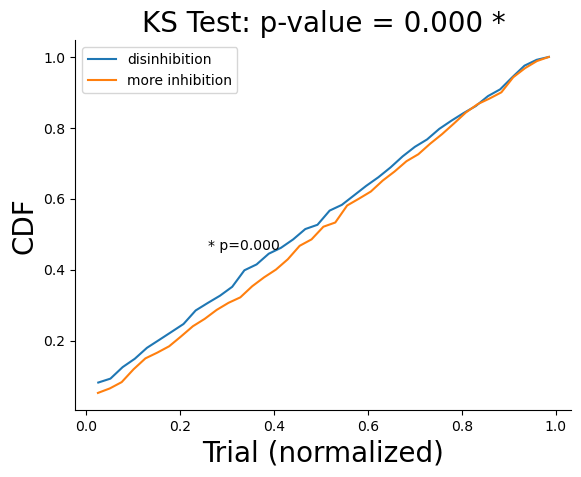

In [206]:
# xx=consec_trial_fr_diff_all.loc[consec_trial_fr_diff_all['inh'] < -inh_thresh]['trial_within_frac']
# yy=consec_trial_fr_diff_all.loc[consec_trial_fr_diff_all['inh'] > inh_thresh]['trial_within_frac']
# ph.plot_cdf_and_ks_test(xx,yy,label1='disinhibition',label2='more inhibition',xlabel='Trial (normalized)')

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'KS Test: p-value = 0.007 *'}, xlabel='Value', ylabel='CDF'>)

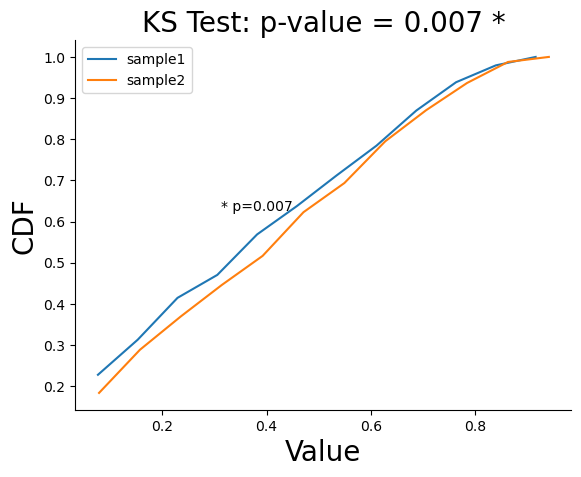

In [212]:
# ma_popup = (consec_trial_fr_diff_all.loc[:,'pyr_1':'pyr_3'] > 0.3).all(axis=1)
# ma = (consec_trial_fr_diff_all['inh'] < -inh_thresh)&ma_popup 
# xx=consec_trial_fr_diff_all.loc[ma]['trial_within_frac']

# ma = (consec_trial_fr_diff_all['inh'] > inh_thresh)&ma_popup 
# yy=consec_trial_fr_diff_all.loc[ma]['trial_within_frac']
# ph.plot_cdf_and_ks_test(xx,yy)

In [88]:
def get_peri_switch_x_raw_grouped(all_sw_inh_all,X_raw_all,ti=0,sw = 1,
                                  inh_thresh = 1,
                                  trial_win = 2,
                                    do_norm=True
                                 ):
    
    
    all_sw_inh_onesw=all_sw_inh_all.query('switch==@sw')
    # all_sw_inh_onesw =all_sw_inh_onesw.loc[all_sw_inh_onesw['pre_ntrial_ge_30_perc_frac_total'] <0.1]
    ma_d = {'disinhibition':all_sw_inh_onesw['inh_fr_change'] < -inh_thresh,
            'more inhibition':all_sw_inh_onesw['inh_fr_change'] > inh_thresh
           }
    

    X_raw_selected_all_d ={}
    for k,ma in ma_d.items():
        all_sw_sub = all_sw_inh_onesw.loc[ma]
        X_raw_selected_all = {}
        for kk,row in all_sw_sub.iterrows():
            tt,uid,field_id,sw_tr=row[['trialtype','uid','field_index','switch_trial']]
            ani,sess=kk[0],kk[1]
            sw_tr = int(sw_tr)
#             pdb.set_trace()
            X_raw_onefield=X_raw_all.loc[(ani,sess,ti,tt,uid,field_id)].dropna().values
            X_raw_onefield_padded=np.concatenate([[np.nan] * trial_win,X_raw_onefield,[np.nan] * trial_win])
            X_raw_selected = pd.Series(X_raw_onefield_padded[sw_tr:sw_tr+trial_win*2+1])

            if do_norm:
                X_raw_selected = X_raw_selected / np.max(X_raw_onefield)
            X_raw_selected_all[(*kk,ti,tt,uid,field_id)]=X_raw_selected 
        X_raw_selected_all = pd.concat(X_raw_selected_all).unstack()
        X_raw_selected_all_d[k] = X_raw_selected_all
    return X_raw_selected_all_d





In [220]:
# sw = 1
# inh_thresh = 1
# all_sw_inh_onesw=all_sw_inh.query('switch==@sw')
# # all_sw_inh_onesw =all_sw_inh_onesw.loc[all_sw_inh_onesw['pre_ntrial_ge_30_perc_frac_total'] <0.1]
# ma_d = {'disinhibition':all_sw_inh_onesw['inh_fr_change'] < -inh_thresh,
#         'more inhibition':all_sw_inh_onesw['inh_fr_change'] > inh_thresh
#        }
# trial_win = 2
# do_norm=True

# X_raw_selected_all_d ={}
# for k,ma in ma_d.items():
#     all_sw_sub = all_sw_inh_onesw.loc[ma]
#     X_raw_selected_all = {}
#     for kk,row in all_sw_sub.iterrows():
#         tt,uid,field_id,sw_tr=row[['trialtype','uid','field_index','switch_trial']]
#         sw_tr = int(sw_tr)
#         X_raw_onefield=X_raw.loc[(tt,uid,field_id)].dropna().values
#         X_raw_onefield_padded=np.concatenate([[np.nan] * trial_win,X_raw_onefield,[np.nan] * trial_win])
#         X_raw_selected = pd.Series(X_raw_onefield_padded[sw_tr:sw_tr+trial_win*2+1])

#         if do_norm:
#             X_raw_selected = X_raw_selected / np.max(X_raw_onefield)
#         X_raw_selected_all[(kk,tt,uid,field_id)]=X_raw_selected 
#     X_raw_selected_all = pd.concat(X_raw_selected_all).unstack()
#     X_raw_selected_all_d[k] = X_raw_selected_all
                                             
                                            



In [89]:
from matplotlib.ticker import MaxNLocator
def mean_across_row_vs_col_with_err(df,value_name='value',var_name='Trial',integer_x=True,fig=None,ax=None):
    df_ = copy.copy(df)
    cols = df.columns
    df_.columns = np.arange(df_.shape[1])
    df_ = df_.melt(var_name=var_name,value_name=value_name)
    if ax is None:
        fig,ax=plt.subplots()
    sns.lineplot(data=df_,x=var_name,y=value_name,ax=ax)
    if integer_x:
        ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    return fig,ax
        

In [197]:
trial_win = 4
sw = 1
do_norm=True
X_raw_selected_all_d = get_peri_switch_x_raw_grouped(all_sw_with_inh_change_all,X_raw_all,trial_win=trial_win,do_norm=do_norm,sw=sw)



In [207]:
tt=0
scipy.stats.ranksums(X_raw_selected_all_d['disinhibition'][tt].dropna(),X_raw_selected_all_d['more inhibition'][tt].dropna())



RanksumsResult(statistic=-2.1266205813699943, pvalue=0.03345162102470232)

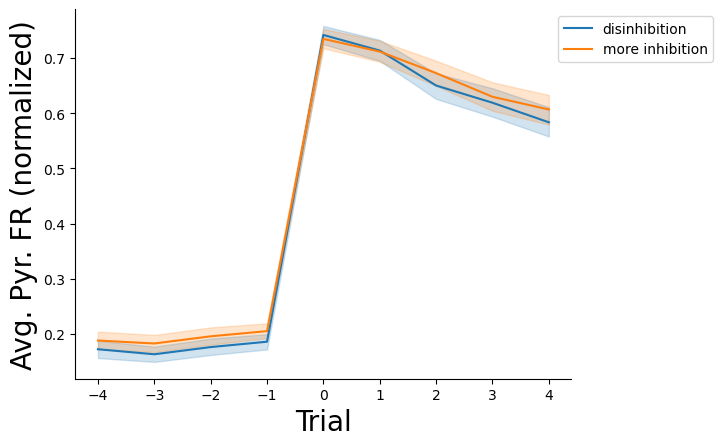

In [198]:
reload(ph)
fig,ax=plt.subplots()

cols_reset=np.arange(-trial_win,trial_win+1)
if do_norm:
    var_name = 'Avg. Pyr. FR (normalized)'
else:
    var_name = 'Avg. Pyr. FR'
for k,val in X_raw_selected_all_d.items():
    fig,ax=ph.mean_across_row_vs_col_with_err(val,ax=ax,value_name=var_name,cols_reset=cols_reset,label=k)
plt.legend(bbox_to_anchor=[1.3,1])
sns.despine()

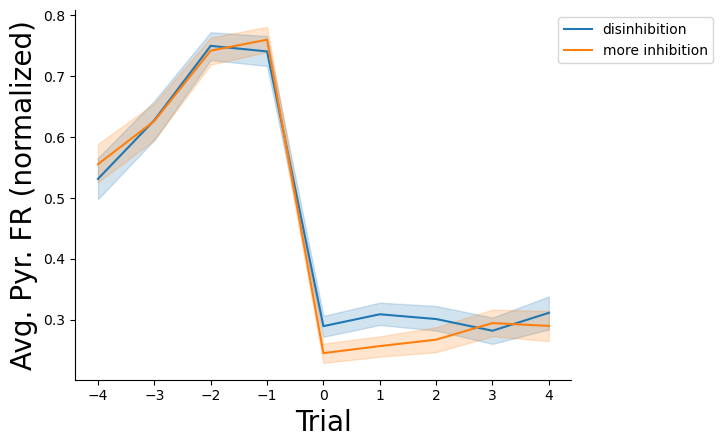

In [370]:
reload(ph)
fig,ax=plt.subplots()

cols_reset=np.arange(-trial_win,trial_win+1)
if do_norm:
    var_name = 'Avg. Pyr. FR (normalized)'
else:
    var_name = 'Avg. Pyr. FR'
for k,val in X_raw_selected_all_d.items():
    fig,ax=ph.mean_across_row_vs_col_with_err(val,ax=ax,value_name=var_name,cols_reset=cols_reset,label=k)
plt.legend(bbox_to_anchor=[1.3,1])
sns.despine()

# conditioned on an increase, the probability of sw, grouped by disinhibition and inhibition

In [399]:
inds[0].values

array(['e13_26m1', 'e13_26m1', 'e13_26m1', ..., 'e14_2m3', 'e14_2m3',
       'e14_2m3'], dtype=object)

In [217]:
all_sw_with_inh_change_all

trialtype  uid  field_index         time  \
e13_26m1 e13_26m1_210913 0       both  168            1  7918.595083   
                         1        1.0   38            1  7974.689653   
                         2        1.0  125            1  7982.708569   
                         3        1.0  150            1  7982.510696   
                         4        1.0  154            3  7976.080179   
...                               ...  ...          ...          ...   
e14_2m3  e14_2m3_201118  15       0.0   35            0  7823.155196   
                         16      both   26            0  7817.548795   
                         17       1.0   29            0  7905.170286   
                         18       1.0   38            1          NaN   
                         19       0.0   50            0  8139.345206   

                             speed_gauss  field_pos  trial_index  switch  \
e13_26m1 e13_26m1_210913 0     33.354894  19.718517            2    -1.0   
                         1     17.427762  96.491241            4    -1.0   
                         2     20.011387  78.110439            4    -1.0   
                         3     23.065528  75.824816            4     1.0   
                         4     17.563432  96.557545            4    -1.0   
...                                  ...        ...          ...     ...   
e14_2m3  e14_2m3_201118  15     4.717832  40.458962           14     1.0   
                         16    38.765659   5.930841           14     1.0   
                         17    13.790938  46.165413           15    -1.0   
                         18          NaN        NaN           18    -1.0   
                         19    28.031099   7.586393           19    -1.0   

                             index_within  switch_trial  ...  \
e13_26m1 e13_26m1_210913 0              1           2.0  ...   
                         1              2           2.0  ...   
                         2              2           2.0  ...   
                         3              2           2.0  ...   
                         4              2           2.0  ...   
...                                   ...           ...  ...   
e14_2m3  e14_2m3_201118  15             9           9.0  ...   
                         16             9          14.0  ...   
                         17             5           5.0  ...   
                         18             6           6.0  ...   
                         19            12          12.0  ...   

                             post_ntrial_le_90_perc_frac_total  \
e13_26m1 e13_26m1_210913 0                            0.957143   
                         1                            0.945946   
                         2                            0.945946   
                         3                            0.162162   
                         4                            0.945946   
...                                                        ...   
e14_2m3  e14_2m3_201118  15                           0.285714   
                         16                           0.333333   
                         17                           0.500000   
                         18                           0.400000   
                         19                           0.142857   

                             post_ntrial_ge_10_perc_frac_total  \
e13_26m1 e13_26m1_210913 0                            0.771429   
                         1                            0.189189   
                         2                            0.567568   
                         3                            0.216216   
                         4                            0.270270   
...                                                        ...   
e14_2m3  e14_2m3_201118  15                           0.357143   
                         16                           0.416667   
                         17                           0.500000   
                         18 

In [252]:
ti=0
all_sw_with_metrics_d_all_oneti = all_sw_with_metrics_d_all.loc[(slice(None),slice(None),ti),:]

sw=-1
data=all_sw_with_metrics_d_all_oneti.query('switch==@sw')

inds=[data.index.get_level_values(0),
    data.index.get_level_values(1),
    data['trialtype'],data['uid'],
    data['field_index'],
    data['switch_trial']-1,
     ]
# for each switch trial, the reference trial should be the one before that


inds=pd.MultiIndex.from_arrays(inds)



In [283]:
data = copy.copy(consec_trial_fr_diff_all)
data['has_sw'] = False
data.loc[inds,'has_sw']=True

In [284]:
from statsmodels.stats.proportion import proportions_ztest
pyr_thresh = 0.
inh_thresh = 0
# ma=(data['pyr_1']>pyr_thresh) & (data['inh']<-inh_thresh)
ma= (data['inh']<-inh_thresh)
xx=data.loc[ma]['has_sw']

# ma=(data['pyr_1']>pyr_thresh) & (data['inh']>inh_thresh)
ma= (data['inh']>inh_thresh)
yy=data.loc[ma]['has_sw']

count=np.array([xx.sum(),yy.sum()])
nobs=np.array([len(xx),len(yy)])

proportions_ztest(count,nobs)

(-20.465340537518113, 4.386073341708924e-93)

In [ ]:
X_raw_max_all_oneti = X_raw_all.max(axis=1).loc[(slice(None),slice(None),ti)]

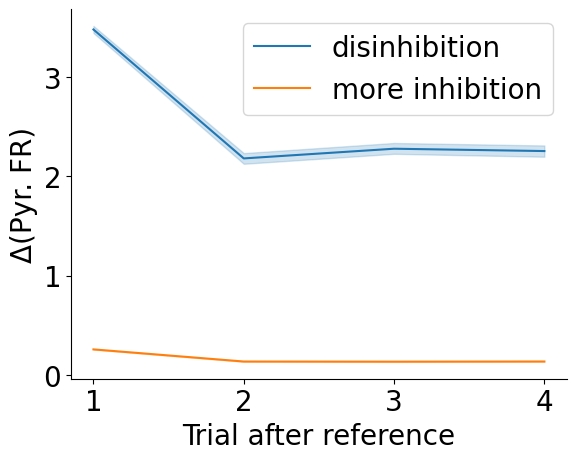

In [289]:
ma= (data['inh']<-inh_thresh) &(data['pyr_1']>pyr_thresh) #& (~data['has_sw'])
cols_reset = np.arange(1,5)
var_name='Trial after reference'
ylabel = u'Δ(Normalized Pyr. FR)'
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']
reverse_norm = True
if reverse_norm:
    X_raw_max_all_oneti = X_raw_all.max(axis=1).loc[(slice(None),slice(None),ti)]
    toplot = toplot * X_raw_max_all_oneti.loc[toplot.index].values[:,None]
    ylabel = u'Δ(Pyr. FR)'
fig,ax=ph.mean_across_row_vs_col_with_err(toplot,label='disinhibition',var_name=var_name,cols_reset=cols_reset)

ma= (data['inh']>inh_thresh) &(data['pyr_1']>pyr_thresh) #& (~data['has_sw'])
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']


ph.mean_across_row_vs_col_with_err(toplot,fig=fig,ax=ax,label='more inhibition',var_name=var_name,cols_reset=cols_reset)
ax.set(ylabel=ylabel)
sns.despine()

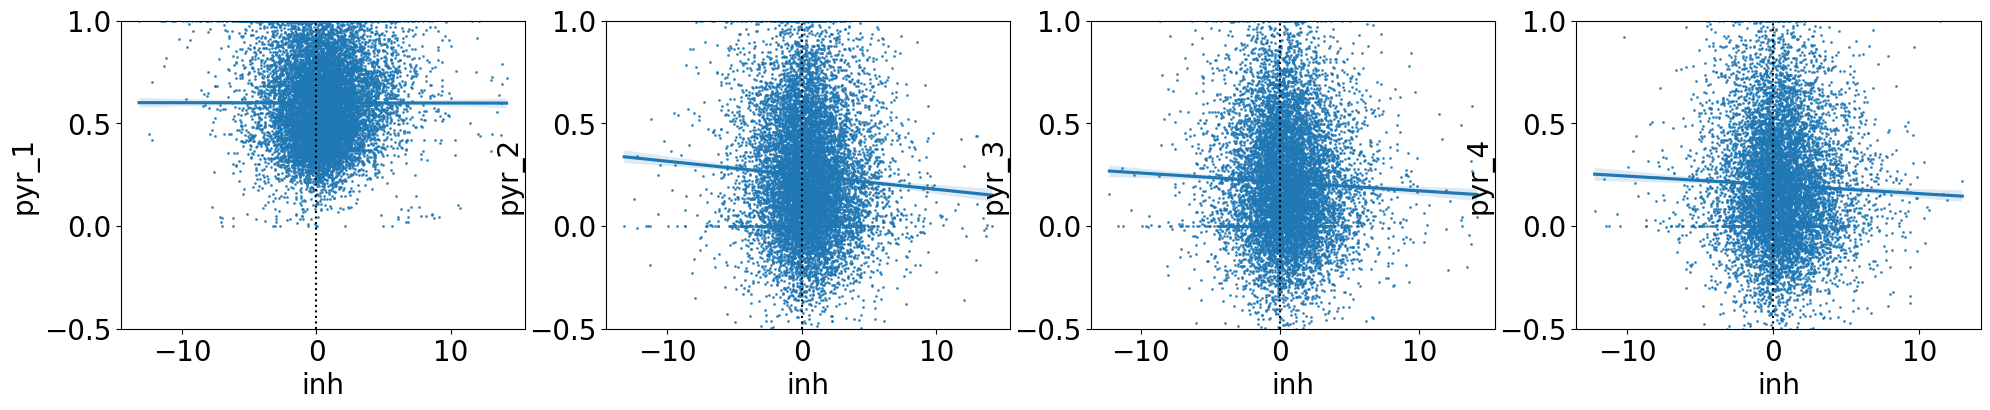

In [328]:
# alex's idea: delta inh vs delta pyr, plotted seperated for each trial lag, select the largest increase trials
inds=data.groupby(level=(0,1,2,3,4),sort=False).apply(lambda x:x['pyr_1'].idxmax())
data_sub=data.loc[inds]
# data_sub.loc[:,'pyr_1':'pyr_4'] = data_sub.loc[:,'pyr_1':'pyr_4'] * X_raw_max_all_oneti.loc[inds].values[:,None]
# ax=sns.scatterplot(data=data_sub,x='inh',y='pyr_1',s=1.)
fig,axs=plt.subplots(1,4,figsize=(4*6,1*4))
for ax,kk in zip(axs,range(1,5)):
#     ax=sns.scatterplot(data=data_sub,x='inh',y=f'pyr_{kk}',s=1.,ax=ax)
    ax=sns.regplot(data=data_sub,x='inh',y=f'pyr_{kk}',ax=ax,scatter_kws={'s':1.})
    ax.axvline(0,color='k',linestyle=':')
#     ax.set_ylim([-20,40])
    ax.set_ylim([-0.5,1.])

In [327]:
inds=data.groupby(level=(0,1,2,3,4),sort=False).apply(lambda x:x['pyr_1'].idxmax())
data_sub=data.loc[inds]

scipy.stats.ranksums(data_sub.query('inh<0')['pyr_2'].dropna(),data_sub.query('inh>0')['pyr_2'].dropna())

RanksumsResult(statistic=3.652750161949677, pvalue=0.0002594466347092493)

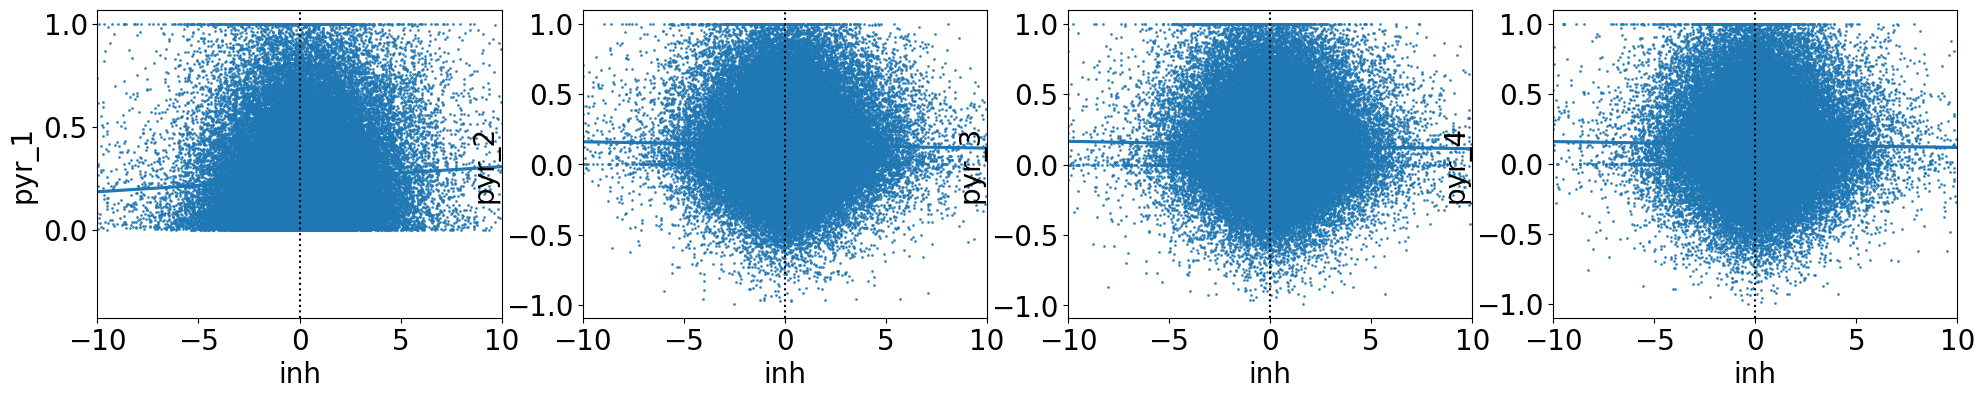

In [324]:
# all increase trials
ma= (data['pyr_1']>pyr_thresh)
data_sub=data.loc[ma]
# data_sub.loc[:,'pyr_1':'pyr_4'] = data_sub.loc[:,'pyr_1':'pyr_4'] * X_raw_max_all_oneti.loc[data_sub.index].values[:,None]
# ax=sns.scatterplot(data=data_sub,x='inh',y='pyr_1',s=1.)
fig,axs=plt.subplots(1,4,figsize=(4*6,1*4))
for ax,kk in zip(axs,range(1,5)):
#     ax=sns.scatterplot(data=data_sub,x='inh',y=f'pyr_{kk}',s=1.,ax=ax)
    ax=sns.regplot(data=data_sub,x='inh',y=f'pyr_{kk}',ax=ax,scatter_kws={'s':1.})
    ax.axvline(0,color='k',linestyle=':')
#     ax.set_ylim([-20,40])
    
    ax.set_xlim([-10,10])

In [322]:
ma= (data['pyr_1']>pyr_thresh)
inds=data.groupby(level=(0,1,2,3,4),sort=False).apply(lambda x:x['pyr_1'].idxmax())
data_sub=data.loc[ma]

scipy.stats.ranksums(data_sub.query('inh<0')['pyr_2'].dropna(),data_sub.query('inh>0')['pyr_2'].dropna())

RanksumsResult(statistic=2.675906577362926, pvalue=0.007452741626852297)

In [394]:
# alex's within field idea:

data = copy.copy(consec_trial_fr_diff_all)
data['disinhibition'] = data['inh'] < -inh_thresh

pyr_thresh = 0.1
ma= (data['pyr_1']>pyr_thresh)
data_sub=data.loc[ma]


# data_grp_by_disinhibition_mean=data.set_index('disinhibition',append=True).groupby(level=(0,1,2,3,4,6),sort=False).mean()
data_grp_by_disinhibition_mean=data.set_index('disinhibition',append=True).groupby(level=(0,1,2,3,4,6),sort=False).median()
data_grp_by_disinhibition_mean_diff = data_grp_by_disinhibition_mean.groupby(level=(0,1,2,3,4)).apply(lambda x: x.iloc[1]-x.iloc[0] if x.shape[0]==2 else x.iloc[0]*np.nan ).dropna(axis=0,how='all')


# data_sub_grp_by_disinhibition_mean = data_sub.set_index('disinhibition',append=True).groupby(level=(0,1,2,3,4,6),sort=False).mean()
# data_sub_grp_by_disinhibition_mean_diff = data_sub_grp_by_disinhibition_mean.groupby(level=(0,1,2,3,4)).apply(lambda x:x.iloc[0]-x.iloc[1] if x.shape[0]==2 else x.iloc[0]*np.nan).dropna(axis=0,how='all')


data_sub['disinhibition'] = data_sub['inh'] < -inh_thresh
gpb = data_sub.groupby(level=(0,1,2,3,4),sort=False)
comparison_d = {}
for k,val in gpb:
#     xx=val.groupby('disinhibition').mean()
    xx=val.groupby('disinhibition').median()
    try:
        comparison = xx.loc[False] - xx.loc[True] 
        comparison=comparison.loc['pyr_1':'pyr_4']
        comparison_d[k] = comparison
    except:
        pass
        
comparison_d = pd.concat(comparison_d,axis=0)
comparison_d=comparison_d.unstack()
data_sub_grp_by_disinhibition_mean_diff = comparison_d

# scipy.stats.wilcoxon(comparison_d['pyr_4'].dropna(),alternative='less')

baseline=data_grp_by_disinhibition_mean_diff.loc[:,'pyr_1':'pyr_4'] > 0
toplot=data_sub_grp_by_disinhibition_mean_diff.loc[:,'pyr_1':'pyr_4'] > 0

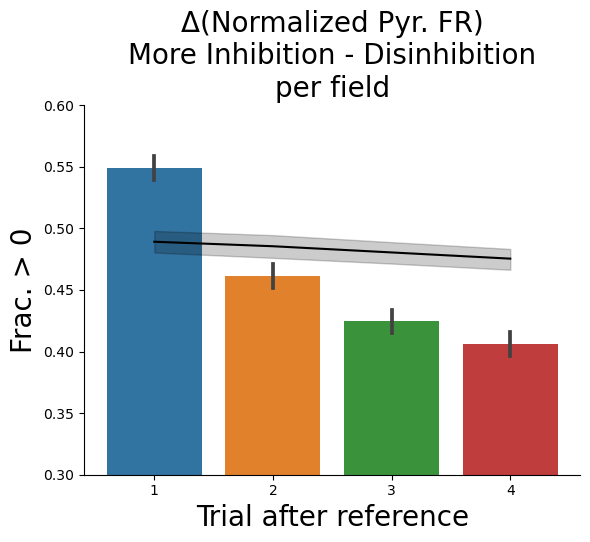

In [443]:
reload(ph)
# ax=sns.barplot(data=toplot.melt(var_name='Trial after reference'),x='Trial after reference',y='value')
cols_reset = None#np.arange(1,5)
fig,ax=ph.mean_across_row_vs_col_with_err(toplot,var_name='Trial after reference',integer_x=True,cols_reset=cols_reset,value_name='Frac. > 0',plot_type='bar')
ax.set_xticks(range(0,4))
ax.set_xticklabels(range(1,5))
ph.mean_across_row_vs_col_with_err(baseline,ax=ax,color='k',cols_reset=cols_reset,integer_x=True)
# ax.set_ylabel('Frac. > 0')

ax.set_ylim([0.3,0.6])
ax.set_title(u'Δ(Normalized Pyr. FR)\nMore Inhibition - Disinhibition\nper field')
sns.despine()

In [381]:
(comparison_d['pyr_3']>0).mean()

0.4279167462287569

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'KS Test: p-value = 0.470'}, xlabel='Value', ylabel='CDF'>)

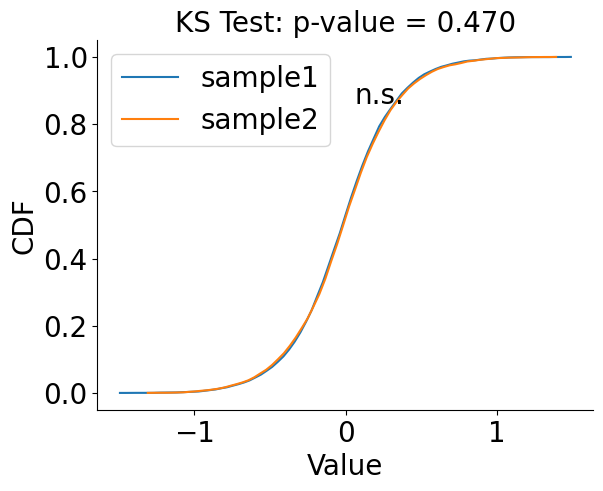

In [383]:
ph.plot_cdf_and_ks_test(comparison_d['pyr_3'].dropna(),comparison_d['pyr_4'].dropna())

<Axes: >

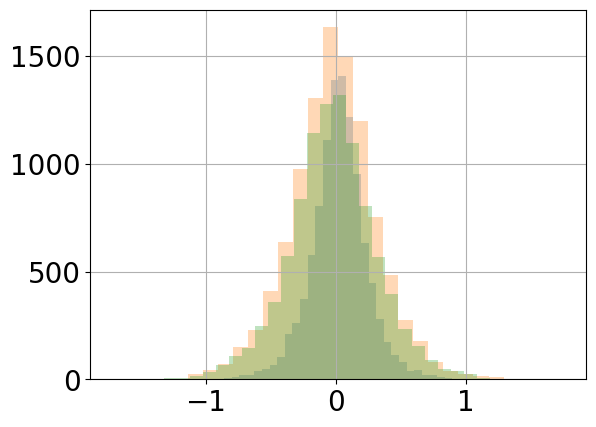

In [357]:
comparison_d['pyr_1'].hist(bins=30,alpha=0.3)
comparison_d['pyr_2'].hist(bins=30,alpha=0.3)
comparison_d['pyr_3'].hist(bins=30,alpha=0.3)

In [345]:
comparison_d

pyr_1     pyr_2     pyr_3     pyr_4
e13_16f1 e13_16f1_210302 0.0  7   1  0.120044 -0.066851  0.299031 -0.012370
                                  3 -0.046768 -0.225733 -0.190690 -0.132683
                                  4  0.123784       NaN       NaN       NaN
                              8   3 -0.003837  0.066969 -0.100676  0.219567
                              9   2 -0.006184 -0.114355  0.113491 -0.042750
...                                       ...       ...       ...       ...
e16_3m2  e16_3m2_211213  both 187 0  0.013059 -0.057351 -0.296336 -0.014090
                              191 0 -0.054211  0.249350  0.060600  0.039631
                              192 0 -0.089504  0.307956  0.177211  0.075095
                              195 0  0.000541 -0.213467 -0.138859 -0.044860
                              202 0  0.001127  0.040006  0.149232  0.061240

[11660 rows x 4 columns]

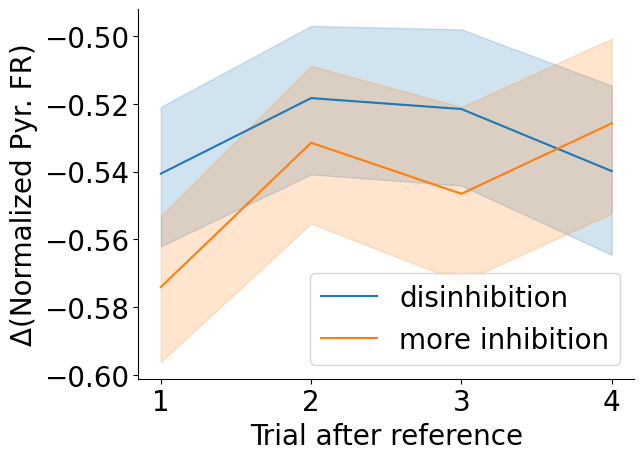

In [256]:
ma= (data['inh']<-inh_thresh) &(data['pyr_1']<-pyr_thresh) & (data['has_sw'])
cols_reset = np.arange(1,5)
var_name='Trial after reference'
ylabel = u'Δ(Normalized Pyr. FR)'
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']
fig,ax=ph.mean_across_row_vs_col_with_err(toplot,label='disinhibition',var_name=var_name,cols_reset=cols_reset)

ma= (data['inh']>inh_thresh) &(data['pyr_1']<-pyr_thresh) & (data['has_sw'])
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']


ph.mean_across_row_vs_col_with_err(toplot,fig=fig,ax=ax,label='more inhibition',var_name=var_name,cols_reset=cols_reset)
ax.set(ylabel=ylabel)
sns.despine()

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Trial', ylabel='value'>)

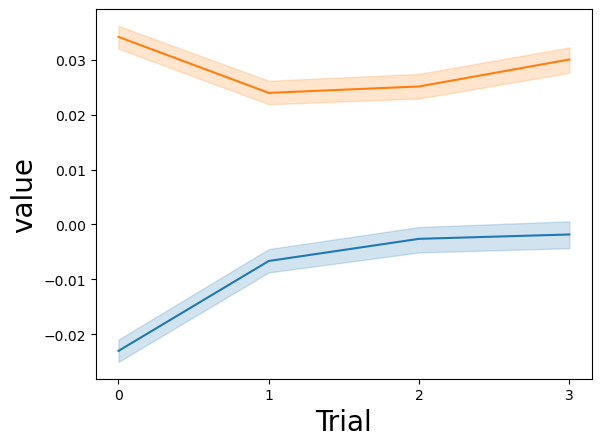

In [130]:
ma= (data['inh']<-inh_thresh)# & (data['has_sw'])
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']
fig,ax=ph.mean_across_row_vs_col_with_err(toplot)

ma= (data['inh']>inh_thresh) #& (data['has_sw'])
toplot=data.loc[ma].loc[:,'pyr_1':'pyr_4']
ph.mean_across_row_vs_col_with_err(toplot,fig=fig,ax=ax)

In [120]:
nobs

array([97032, 92802])

In [121]:
count/nobs

array([0.01714898, 0.02128187])

In [ ]:
all_sw_with_inh_change_all

# example session, demonstrate u-stat

In [8]:
consec_trial_fr_diff_all.index.get_level_values(0).unique()

Index(['e13_26m1', 'e15_13f1', 'e13_16f1', 'e16_3m2', 'e16_3m1', 'e15_10m1',
       'e15_9f1', 'e14_2m2', 'e16_1f1', 'e14_2m3', 'e16_2m1'],
      dtype='object')

In [53]:
ani = 'e15_13f1'
sess='e15_13f1_220117'
consec_trial_fr_diff_one = consec_trial_fr_diff_all.loc[ani,sess]

/tmp/ipykernel_3836360/1144504144.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  consec_trial_fr_diff_one = consec_trial_fr_diff_all.loc[ani,sess]


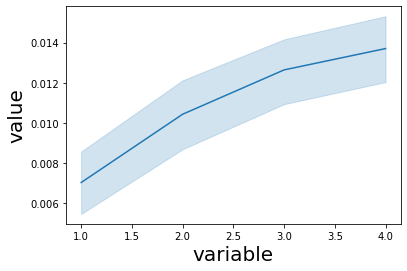

In [36]:

data=consec_trial_fr_diff_all




In [79]:
import sw_and_int_one_sess as sios
reload(sios)
data_dir_full = subdb['data_dir_full'].iloc[1]
res=sios.main(data_dir_full,dosave=False,force_reload=True)

/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/fr_map_with_int.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/place_field_afterheadscan_recombine.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/sw_res_afterheadscan.p exists; loading---


In [80]:
consec_trial_fr_diff_one=res['consec_trial_fr_diff_all']

In [105]:
ti=0
per_field_metrics_one = per_field_metrics_all.loc[ani,sess].loc[ti]

/tmp/ipykernel_3836360/3700040777.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  per_field_metrics_one = per_field_metrics_all.loc[ani,sess].loc[ti]


In [140]:
# inds=per_field_metrics_one.index[per_field_metrics_one['mean'] > 7]
# inds=per_field_metrics_one.index[per_field_metrics_one['mean'] < 2]

In [158]:
base_colors = {
    'pyr': plt.cm.tab10(7),  # Blue color from the tab10 colormap
    'int': plt.cm.tab10(8)   # Orange color from the tab10 colormap
}

def adjust_lightness(color, amount=0.5):
    import colorsys
    h, l, s = colorsys.rgb_to_hls(*color[:3])
    l = max(min(l * amount, 1.0), 0.0)
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return r, g, b, color[3]

colors = {
    'pyr_up': adjust_lightness(base_colors['pyr'], 1.5),  # Slightly lighter
    'pyr_down': adjust_lightness(base_colors['pyr'], 0.5),  # Slightly darker
    'int_up': adjust_lightness(base_colors['int'], 1.5),  # Slightly lighter
    'int_down': adjust_lightness(base_colors['int'], 0.5)  # Slightly darker
}


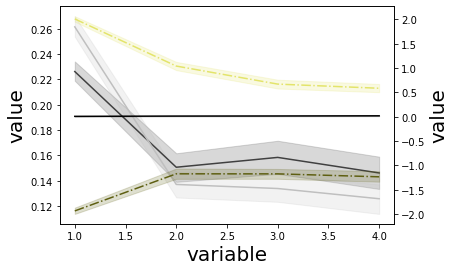

In [159]:
fig,ax=plt.subplots()
data=consec_trial_fr_diff_one
# data=consec_trial_fr_diff_one.reset_index(level=3).loc[inds].set_index('level_3',append=True)

pyr_up_thresh = 0.
ma = (data['inh'] < inh_thresh) & (data['pyr_1'] > pyr_up_thresh)
data_toplot=data.loc[ma,'pyr_1':'pyr_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax,color=colors['pyr_down'])
ax2 = ax.twinx()
data_toplot=data.loc[ma,'int_1':'int_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax2=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax2,color=colors['int_down'],linestyle='-.')

ma = (data['inh'] > inh_thresh) & (data['pyr_1'] > pyr_up_thresh)
data_toplot=data.loc[ma,'pyr_1':'pyr_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax,color=colors['pyr_up'])

data_toplot=data.loc[ma,'int_1':'int_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax2=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax2,linestyle='-.',color=colors['int_up'])

data_toplot=data.loc[:,'pyr_1':'pyr_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax=sns.lineplot(data=data_toplot,x='variable',y='value',ax=None,color='k')





In [98]:
data

inh     pyr_1     pyr_2     pyr_3     pyr_4     int_1  \
0.0  31  1 0  -1.065279  0.133460  0.447060  0.268841  0.085349 -1.065279   
           1   5.863067  0.313600  0.135380 -0.048112  0.125014  5.863067   
           2  -5.377270 -0.178219 -0.361711 -0.188586 -0.434112 -5.377270   
           3  -2.091700 -0.183492 -0.010366 -0.255893 -0.035915 -2.091700   
           4   2.434154  0.173126 -0.072401  0.147577  0.126617  2.434154   
...                 ...       ...       ...       ...       ...       ...   
both 376 0 27  4.226136 -0.008691 -0.069911 -0.143760 -0.136385  4.226136   
           28 -7.062527 -0.061221 -0.135069 -0.127694       NaN -7.062527   
           29  0.847759 -0.073848 -0.066474       NaN       NaN  0.847759   
           30 -0.618051  0.007375       NaN       NaN       NaN -0.618051   
           31       NaN       NaN       NaN       NaN       NaN       NaN   

                  int_2     int_3     int_4  fr_prior  
0.0  31  1 0   4.797787 -0.579483 -2.671183  0.278431  
           1   0.485797 -1.605903  0.828251  0.345161  
           2  -7.468970 -5.034816 -5.298753  0.471938  
           3   0.342454  0.078517 -0.105857  0.490771  
           4   2.170217  1.985843  2.017440  0.465373  
...                 ...       ...       ...       ...  
both 376 0 27 -2.836390 -1.988632 -2.606683  0.344649  
           28 -6.214768 -6.832819       NaN  0.338540  
           29  0.229707       NaN       NaN  0.330798  
           30       NaN       NaN       NaN  0.321173  
           31       NaN       NaN       NaN       NaN  

[12300 rows x 10 columns]

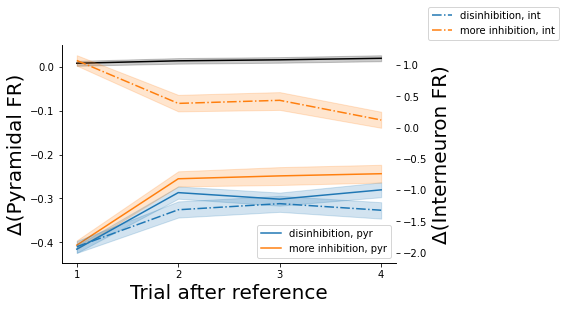

In [175]:

from matplotlib.ticker import MaxNLocator

fig,ax=plt.subplots()
data=consec_trial_fr_diff_one
pyr_up_thresh = -0.2
inh_thresh = -1
ma = (data['inh'] < -inh_thresh) & (data['pyr_1'] < pyr_up_thresh)
data_toplot=data.loc[ma,'pyr_1':'pyr_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax,label='disinhibition, pyr')
ax2 = ax.twinx()
data_toplot=data.loc[ma,'int_1':'int_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax2=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax2,linestyle='-.',label='disinhibition, int')

ma = (data['inh'] > inh_thresh) & (data['pyr_1'] < pyr_up_thresh)
data_toplot=data.loc[ma,'pyr_1':'pyr_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax,label='more inhibition, pyr')

data_toplot=data.loc[ma,'int_1':'int_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax2=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax2,linestyle='-.',label='more inhibition, int')

data_toplot=data.loc[:,'pyr_1':'pyr_4'].rename(lambda x:int(x.split('_')[1]),axis=1).melt()
ax=sns.lineplot(data=data_toplot,x='variable',y='value',ax=ax,color='k')
plt.legend(bbox_to_anchor=[1.5,1.2])


ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylabel(u'Δ(Pyramidal FR)')
ax.set_xlabel('Trial after reference')
ax2.set_ylabel(u'Δ(Interneuron FR)')
sns.despine()

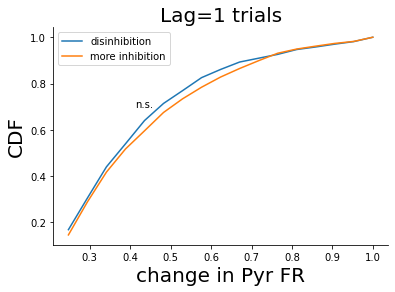

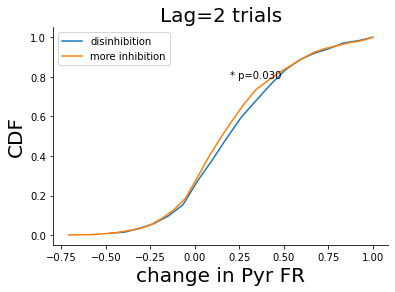

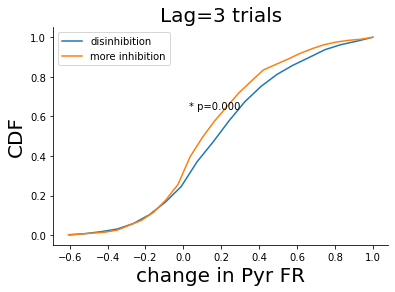

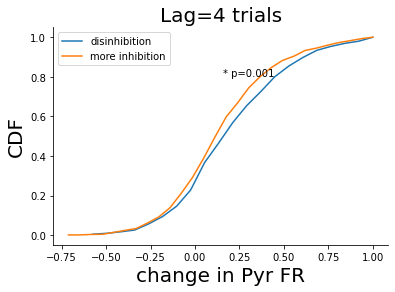

In [15]:
pyr_up_thresh = 0.2
inh_thresh=0.
data=consec_trial_fr_diff_one
for kk in range(1,5):
    ma=(data['pyr_1'] > pyr_up_thresh) & (data['inh'] < inh_thresh)
    xx=data.loc[ma][f'pyr_{kk}']
    ma=(data['pyr_1'] > pyr_up_thresh) & (data['inh'] > -inh_thresh)
    yy=data.loc[ma][f'pyr_{kk}']
    fig,ax=ph.plot_cdf_and_ks_test(xx,yy,label1='disinhibition',label2='more inhibition',xlabel='change in Pyr FR',title=f'Lag={kk} trials')

# per session U-stat

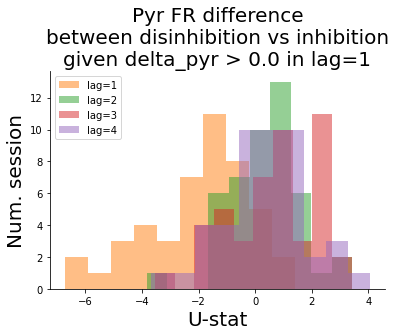

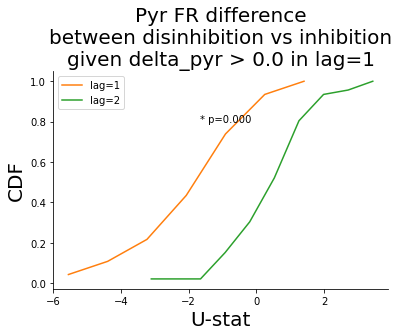

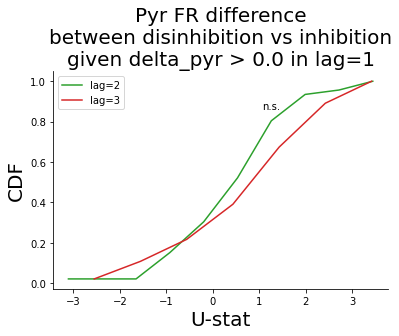

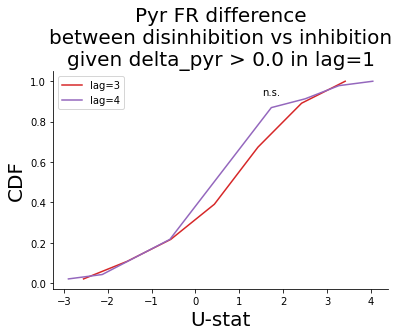

In [5]:
reload(ph)
savefig = False
# pth=0.2
pth=0.
label_l = {l:f'lag={l}' for l in range(1,5)}
title=f'Pyr FR difference\nbetween disinhibition vs inhibition\ngiven delta_pyr > {pth} in lag=1'
fig,ax=plt.subplots()
for kk in range(1,5):
    ax=sustained_all.loc[(slice(None),slice(None),pth,kk),'w_stat'].hist(alpha=0.5,grid=False,color=f'C{kk}',label=label_l[kk])
    sns.despine()
    ax.legend()
    ax.set(xlabel='U-stat',ylabel='Num. session')
    ax.set_title(title)
savefn=os.path.join(figdir,f'u_stat_across_sessions_pyr_up_thresh_{pth:.0e}.svg')
fig.savefig(savefn,bbox_inches='tight')
savefn=os.path.join(figdir,f'u_stat_across_sessions_pyr_up_thresh_{pth:.0e}.png')
fig.savefig(savefn,bbox_inches='tight')


for kk in range(1,4):
    xx=sustained_all.loc[(slice(None),slice(None),pth,kk),'w_stat']
    yy=sustained_all.loc[(slice(None),slice(None),pth,kk+1),'w_stat']
    fig,ax=ph.plot_cdf_and_ks_test(xx,yy,c_l=[f'C{kk}',f'C{kk+1}'],label1=label_l[kk],label2=label_l[kk+1],
                                   xlabel='U-stat',title=title
                                  )
    
    if savefig:
        savefn=os.path.join(figdir,f'ks_for_ustat_lag_{kk}_{kk+1}_pyr_up_thresh_{pth:.0e}.svg')
        fig.savefig(savefn,bbox_inches='tight')
        savefn=os.path.join(figdir,f'ks_for_ustat_lag_{kk}_{kk+1}_pyr_up_thresh_{pth:.0e}.png')
        fig.savefig(savefn,bbox_inches='tight')

